In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

#### 1. 读取图片

In [6]:
# 公共 tf.gfile.FastGFile 读取图片
image_raw_data = tf.gfile.FastGFile("../../datasets/cat.jpg",'rb').read()

with tf.Session() as sess:
    # tf.iamge.decode_jpeg  解析 raw jepg image
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维(rgb)矩阵 Tensor
    print(img_data.eval())
    print(img_data.get_shape()) # 输出 [?,?,?]
    print(tf.shape(img_data))
    print(img_data.get_shape())

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ...
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ...
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ...
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ...

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ...
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ...
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ...
  [108  86  49]
  [105  82  48]
  [104  81  49]]]
(?, ?, ?)
Tensor("Shape_2:0", shape=(3,), dtype=int32)
(1797, 2673, 3)


#### 2. 打印图片、写入

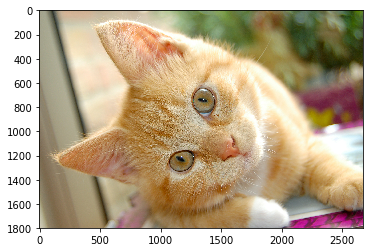

In [22]:
with tf.Session() as sess:
    plt.imshow(img_data.eval()) # imshow
    plt.show()
    
    encoded_image = tf.image.encode_jpeg(img_data) # 重新编码
    # <tf.Tensor 'EncodeJpeg_1:0' shape=() dtype=string>

    with tf.gfile.FastGFile("/Users/louisun/Desktop/output_cat.jpeg", "wb") as f:
        f.write(encoded_image.eval())

#### 3. 重新调整图片大小

网络上获取的图像大小不是固定的，但是神经网络输入节点的个数是固定的

Tesnorflow 提供了 4 种不同的方法，调整图像的大小，封装到了 `tf.image.resize_images` 函数

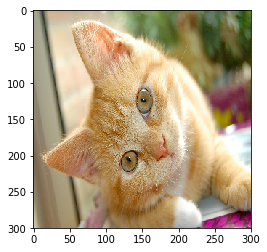

In [56]:
with tf.Session() as sess:
    
    # 本书建议在调整图片大小前，先将图片数值转为实数，这会将 0-255 的像素值转换为 0.0-1.0 范围的实数
    # tf.image.convert_image_dtype
    image_float = tf.image.convert_image_dtype(img_data, tf.float32) # 注意 image_float 矩阵值是0-1之间的小数
    
    # tf.iamge.resize_images,   第二个参数是大小，   第三个是调整过图像大小的算法
    resized = tf.image.resize_images(image_float, [300, 300], method=0)
    
    plt.imshow(resized.eval()) # rgb 显示
    plt.show()
    
    e_image = tf.image.encode_jpeg(tf.image.convert_image_dtype(resized, tf.uint8))
    with tf.gfile.FastGFile("/Users/louisun/Desktop/output_cat.jpeg", "wb") as f:
        f.write(e_image.eval())

method 取值
- 0：双线性插值法
- 1：最近邻居法
- 2：双三次插值法
- 3：面积插值法

#### 4. 裁剪和填充图片

`tf.image.resize_image_with_vrop_or_pad(img_data,  size1, size2)`

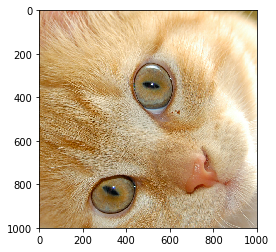

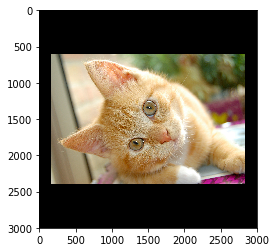

In [34]:
with tf.Session() as sess:    
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000)
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000) # 全 0 填充
    plt.imshow(croped.eval())
    plt.show()
    plt.imshow(padded.eval())
    plt.show()

#### 5. 截取中间50%的图片

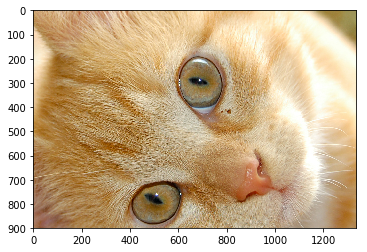

In [35]:
with tf.Session() as sess:   
    # tf.image.central_crop 可按比例裁剪图像，第二个参数为调整比例
    central_cropped = tf.image.central_crop(img_data, 0.5)
    plt.imshow(central_cropped.eval())
    plt.show()

#### 6. 翻转图片

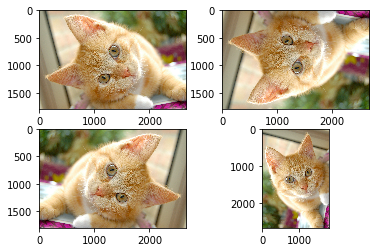

In [50]:
# plt.imshow 还是要求uint8的矩阵，不能是 float

with tf.Session() as sess: 
    plt.figure(1)
    
    # 原始图像
    plt.subplot(221)
    plt.imshow(img_data.eval())
    
    # 上下翻转
    plt.subplot(222)
    flipped1 = tf.image.flip_up_down(img_data)
    plt.imshow(flipped1.eval())
    

    # 左右翻转
    plt.subplot(223)
    flipped2 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped2.eval())
    
    # 对角线翻转
    plt.subplot(224)
    transposed = tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    plt.show()
    
    # 以一定概率上下翻转图片。
    #flipped = tf.image.random_flip_up_down(img_data)
    
    # 以一定概率左右翻转图片。
    #flipped = tf.image.random_flip_left_right(img_data)

#### 7. 图片色彩调整

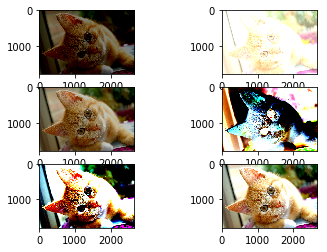

In [62]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    # 1. 将图片的亮度-0.5。
    plt.subplot("321")
    adjusted_1 = tf.image.adjust_brightness(image_float, -0.5)
    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted_1 = tf.clip_by_value(adjusted_1, 0.0, 1.0)
    plt.imshow(adjusted_1.eval())
    
    
    # 2. 将图片的亮度+0.5
    plt.subplot("322")
    adjusted_2 = tf.image.adjust_brightness(image_float, 0.5)
    adjusted_2 = tf.clip_by_value(adjusted_2, 0.0, 1.0)
    plt.imshow(adjusted_2.eval())
    
    
    # 3. 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    plt.subplot("323")
    adjusted_3 = tf.image.random_brightness(image_float, max_delta=0.5) #[-0.5, 0.5]范围调整
    adjusted_3 = tf.clip_by_value(adjusted_3, 0.0, 1.0)
    plt.imshow(adjusted_3.eval())
    
    
    # 4. 将图片的对比度-5
    
    plt.subplot("324")
    adjusted_4 = tf.image.adjust_contrast(image_float, -5)
    adjusted_4 = tf.clip_by_value(adjusted_4, 0.0, 1.0)
    plt.imshow(adjusted_4.eval())

    
    # 5. 将图片的对比度+5
    plt.subplot("325")
    adjusted_5 = tf.image.adjust_contrast(image_float, 5)
    adjusted_5 = tf.clip_by_value(adjusted_5, 0.0, 1.0)
    plt.imshow(adjusted_5.eval())
    
    # 6. 在[lower, upper]的范围随机调整图的对比度。
    plt.subplot("326")
    adjusted_6 = tf.image.random_contrast(image_float, 1, 2)
    adjusted_6 = tf.clip_by_value(adjusted_6, 0.0, 1.0)
    plt.imshow(adjusted_6.eval())

    plt.show()

#### 8. 添加色相和饱和度

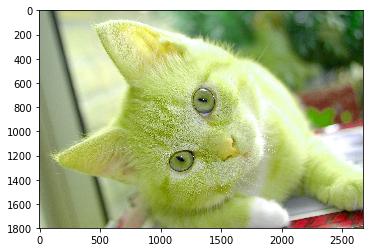

In [66]:
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    adjusted = tf.image.adjust_hue(image_float, 0.1)
    #adjusted = tf.image.adjust_hue(image_float, 0.3)
    #adjusted = tf.image.adjust_hue(image_float, 0.6)
    #adjusted = tf.image.adjust_hue(image_float, 0.9)
    
    # 在[-max_delta, max_delta]的范围随机调整图片的色相。max_delta的取值在[0, 0.5]之间。
    #adjusted = tf.image.random_hue(image_float, max_delta)
    
    # 将图片的饱和度-5。
    #adjusted = tf.image.adjust_saturation(image_float, -5)
    # 将图片的饱和度+5。
    #adjusted = tf.image.adjust_saturation(image_float, 5)
    # 在[lower, upper]的范围随机调整图的饱和度。
    #adjusted = tf.image.random_saturation(image_float, lower, upper)
    
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    #adjusted = tf.image.per_image_whitening(image_float)
    
    # 在最终输出前，将实数取值截取到0-1范围内。
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

#### 9. 图像标准化

将图像上的亮度均值变为0，方差变为1

使用`tf.iamge.per_image_standardization`

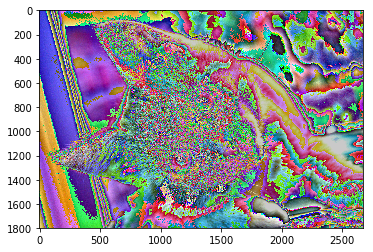

In [70]:
with tf.Session() as sess:
    adjusted_standardization = tf.image.per_image_standardization(img_data)
    adjusted_standardization = tf.image.convert_image_dtype(adjusted_standardization, tf.uint8)
    plt.imshow(adjusted_standardization.eval())
    plt.show()

#### 10. 添加标注框并裁减。

[[[0.02337229 0.16386083 0.85086256 0.64384586]]]


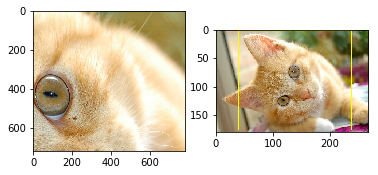

In [77]:
with tf.Session() as sess:         
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]]) # 4 个点对应轴的坐标（0-1）范围相对位置
    
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    # 随机截取图像
    # min_object_covered=0.4 表示截取的部分至少包含某个标准框40%内容
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_float), bounding_boxes=boxes, min_object_covered=0.4)
    # 截取后的图片
    distorted_image = tf.slice(image_float, begin, size)  
    plt.subplot("121")
    plt.imshow(distorted_image.eval())
    
    
    
    
    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    
    # 下面 draw_bounding_boxes 第一个参数是四维矩阵（第一维是 batch 的数目: 多张图片）
    batchced_img = tf.expand_dims(image_small, 0) # 在axis=0处，增加一个维度
    
    image_with_box = tf.image.draw_bounding_boxes(batchced_img, bbox_for_draw)
    print(bbox_for_draw.eval())
    
    plt.subplot("122")
    plt.imshow(image_with_box[0].eval())
    plt.show()
    

    
    